# Imports

In [1]:
!pip install basemap
!pip install basemap-data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score as silhouette
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('covid-19-all.csv', low_memory=False)
df.head()

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
0,NaN,NaN,NaN,NaN,51526.0,41727.0,2191.0,2021-01-01
1,NaN,NaN,NaN,NaN,58316.0,33634.0,1181.0,2021-01-01
2,NaN,NaN,NaN,NaN,99897.0,67395.0,2762.0,2021-01-01
3,NaN,NaN,NaN,NaN,8117.0,7463.0,84.0,2021-01-01
4,NaN,NaN,NaN,NaN,17568.0,11146.0,405.0,2021-01-01


# EDA and Pre-processing

In [5]:
df.isnull().sum()

Country/Region    171061
Province/State    223208
Latitude          171062
Longitude         171062
Confirmed             19
Recovered            386
Deaths               432
Date                   0
dtype: int64

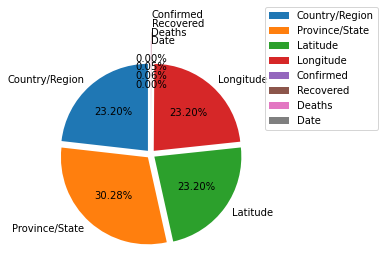

In [6]:
null_labels = ['Country/Region', 'Province/State', 'Latitude', 'Longitude', 'Confirmed', 'Recovered', 'Deaths', 'Date']
null_explode = [0.05, 0.05, 0.05, 0.05, 0.5, 0.4, 0.3, 0.2]
plt.pie(null_vals,labels = null_labels, autopct = '%1.2f%%', explode = null_explode, startangle = 90)
plt.legend(bbox_to_anchor=(1,1.2))
plt.show()

In [7]:
df.shape

(1241952, 8)

In [8]:
df.tail()

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
1241947,Vietnam,NaN,14.058324,108.277199,1465.0,1325.0,35.0,2020-12-31
1241948,West Bank and Gaza,NaN,31.952200,35.233200,138004.0,117183.0,1400.0,2020-12-31
1241949,Yemen,NaN,15.552727,48.516388,2099.0,1394.0,610.0,2020-12-31
1241950,Zambia,NaN,-13.133897,27.849332,20725.0,18660.0,388.0,2020-12-31
1241951,Zimbabwe,NaN,-19.015438,29.154857,13867.0,11250.0,363.0,2020-12-31


In [9]:
df = df.dropna(subset = ['Latitude', 'Longitude', 'Confirmed'])

In [10]:
df.isnull().sum()

Country/Region        0
Province/State    52140
Latitude              0
Longitude             0
Confirmed             0
Recovered           367
Deaths              413
Date                  0
dtype: int64

In [11]:
df.head()

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
83523,China,Anhui,31.8257,117.2264,1.0,NaN,NaN,2020-01-22
83524,China,Beijing,40.1824,116.4142,14.0,NaN,NaN,2020-01-22
83525,China,Chongqing,30.0572,107.8740,6.0,NaN,NaN,2020-01-22
83526,China,Fujian,26.0789,117.9874,1.0,NaN,NaN,2020-01-22
83528,China,Guangdong,23.3417,113.4244,26.0,NaN,NaN,2020-01-22


In [12]:
df.Date.unique()

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-

In [13]:
#date: '2020-12-31'
data = df.loc[(df.Date == '2020-08-26')]
data

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
734483,Afghanistan,NaN,33.939110,67.709953,38103.0,29042.0,1402.0,2020-08-26
734484,Albania,NaN,41.153300,20.168300,8927.0,4633.0,263.0,2020-08-26
734485,Algeria,NaN,28.033900,1.659600,42619.0,29886.0,1465.0,2020-08-26
734486,Andorra,NaN,42.506300,1.521800,1098.0,893.0,53.0,2020-08-26
734487,Angola,NaN,-11.202700,17.873900,2332.0,977.0,103.0,2020-08-26
...,...,...,...,...,...,...,...,...
738429,Vietnam,NaN,14.058324,108.277199,1034.0,632.0,30.0,2020-08-26
738430,West Bank and Gaza,NaN,31.952200,35.233200,20155.0,13929.0,137.0,2020-08-26
738431,Yemen,NaN,15.552727,48.516388,1930.0,1097.0,560.0,2020-08-26
738432,Zambia,NaN,-13.133897,27.849332,11376.0,10693.0,282.0,2020-08-26


In [14]:
data = data.drop(['Country/Region', 'Province/State', 'Recovered', 'Deaths', 'Date'], axis = 1)

In [15]:
data

,Latitude,Longitude,Confirmed
734483,33.939110,67.709953,38103.0
734484,41.153300,20.168300,8927.0
734485,28.033900,1.659600,42619.0
734486,42.506300,1.521800,1098.0
734487,-11.202700,17.873900,2332.0
...,...,...,...
738429,14.058324,108.277199,1034.0
738430,31.952200,35.233200,20155.0
738431,15.552727,48.516388,1930.0
738432,-13.133897,27.849332,11376.0


# Unsupervised Clustering Algorithms

## K-Means Algorithm

In [16]:
# Train the KMeans clustering algorithm
kmeans = KMeans(n_init = 42, n_clusters=8)
labels = kmeans.fit_predict(data)

In [17]:
labels

array([2, 5, 2, ..., 0, 5, 0])

In [18]:
# Calculate the silhouette score
silhouette_score = silhouette(data, labels, metric='euclidean')

print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.8578287277073331


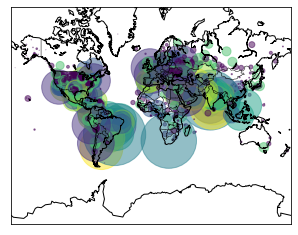

In [20]:
# Plot the data points with different colors for each cluster
m = Basemap(projection='merc',
            llcrnrlat=-80,
            urcrnrlat=80,
            llcrnrlon=-180,
            urcrnrlon=180,
            lat_ts=20,
            resolution='c')

latitudes = data.loc[:, 'Latitude']
longitudes = data.loc[:, 'Longitude']
cases = data.loc[:, 'Confirmed']
x, y = m(longitudes, latitudes)
m.drawcoastlines()
m.drawcountries()
m.scatter(x, y, s=cases*0.005, c=labels, cmap='viridis', alpha=0.5)

plt.show()

## Birch Algorithm 

In [21]:
# fit the birch clustering model to the dataset
birch = Birch(threshold=0.5, branching_factor=50)
birch_model = birch.fit(data)

In [22]:
# predict the clusters
labels = birch_model.predict(data)
normal_labels1 = labels.tolist()

In [23]:
# Calculate the silhouette score
silhouette_score = silhouette(data, normal_labels1, metric='euclidean')

print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.9409221980378023


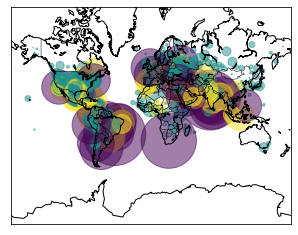

In [24]:
# Plot the data points with different colors for each cluster
m = Basemap(projection='merc',
            llcrnrlat=-80,
            urcrnrlat=80,
            llcrnrlon=-180,
            urcrnrlon=180,
            lat_ts=20,
            resolution='c')

latitudes = data.loc[:, 'Latitude']
longitudes = data.loc[:, 'Longitude']
cases = data.loc[:, 'Confirmed']
x, y = m(longitudes, latitudes)
m.drawcoastlines()
m.drawcountries()
m.scatter(x, y, s=cases*0.005, c=labels, cmap='viridis', alpha=0.5)

plt.show()

## Gaussian Mixture Model Algorithm

In [25]:
# Perform hotspot detection using Gaussian Mixture Models
gmm = GaussianMixture(n_components=3)
gmm.fit(data)
labels = gmm.predict(data)

In [26]:
normal_labels2 = labels.tolist()

In [27]:
# Calculate the silhouette score
silhouette_score = silhouette(data, normal_labels2, metric='euclidean')

print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.5244693754087414


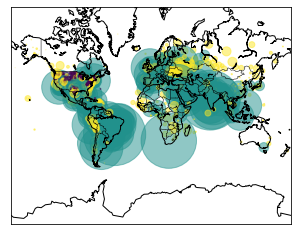

In [28]:
# Plot the data points with different colors for each cluster
m = Basemap(projection='merc',
            llcrnrlat=-80,
            urcrnrlat=80,
            llcrnrlon=-180,
            urcrnrlon=180,
            lat_ts=20,
            resolution='c')

latitudes = data.loc[:, 'Latitude']
longitudes = data.loc[:, 'Longitude']
cases = data.loc[:, 'Confirmed']
x, y = m(longitudes, latitudes)
m.drawcoastlines()
m.drawcountries()
m.scatter(x, y, s=cases*0.005, c=labels, cmap='viridis', alpha=0.5)

plt.show()

## Hierarchical Clustering Algorithm

In [29]:
# Perform hierarchical clustering
model = AgglomerativeClustering(n_clusters=4)
labels = model.fit_predict(data)

In [30]:
normal_labels3 = labels.tolist()

In [31]:
# Calculate the silhouette score
silhouette_score = silhouette(data, normal_labels3, metric='euclidean')

print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.9427003490280537


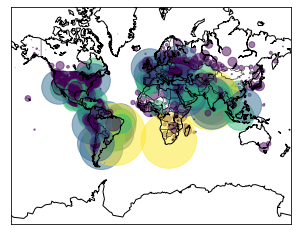

In [32]:
# Plot the data points with different colors for each cluster
m = Basemap(projection='merc',
            llcrnrlat=-80,
            urcrnrlat=80,
            llcrnrlon=-180,
            urcrnrlon=180,
            lat_ts=20,
            resolution='c')

latitudes = data.loc[:, 'Latitude']
longitudes = data.loc[:, 'Longitude']
cases = data.loc[:, 'Confirmed']
x, y = m(longitudes, latitudes)
m.drawcoastlines()
m.drawcountries()
m.scatter(x, y, s=cases*0.005, c=labels, cmap='viridis', alpha=0.5)

plt.show()

## Mean-Shift Clustering Algorithm

In [33]:
# Fit the Mean Shift clustering model
clustering = MeanShift().fit(data)
labels = clustering.labels_

In [34]:
normal_labels4 = labels.tolist()

In [35]:
# Calculate the silhouette score
silhouette_score = silhouette(data, normal_labels4, metric='euclidean')

print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.8627866640325252


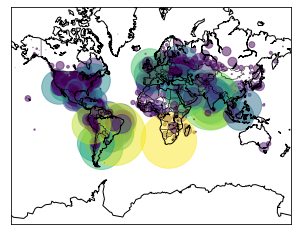

In [36]:
# Plot the data points with different colors for each cluster
m = Basemap(projection='merc',
            llcrnrlat=-80,
            urcrnrlat=80,
            llcrnrlon=-180,
            urcrnrlon=180,
            lat_ts=20,
            resolution='c')

latitudes = data.loc[:, 'Latitude']
longitudes = data.loc[:, 'Longitude']
cases = data.loc[:, 'Confirmed']
x, y = m(longitudes, latitudes)
m.drawcoastlines()
m.drawcountries()
m.scatter(x, y, s=cases*0.005, c=labels, cmap='viridis', alpha=0.5)

plt.show()

# Accuracy

## Silhouette Score

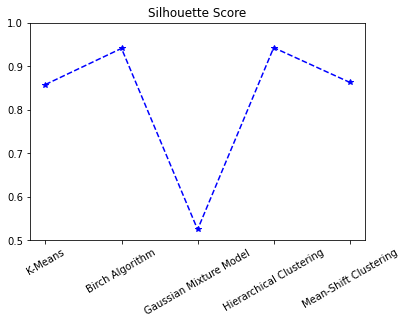

In [40]:
x = ['K-Means', 
     'Birch Algorithm', 
     'Gaussian Mixture Model', 
     'Hierarchical Clustering', 
     'Mean-Shift Clustering']
y = [0.8578287277073331, 
     0.9409221980378023, 
     0.5244693754087414, 
     0.9427003490280537, 
     0.8627866640325252]
#plt.scatter(x, y)
plt.title("Silhouette Score")
plt.plot(x, y, 'b*--')
plt.xticks(rotation = 30)
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()

## Heatmap

In [38]:
corr_matrix = df.corr()

<AxesSubplot:>

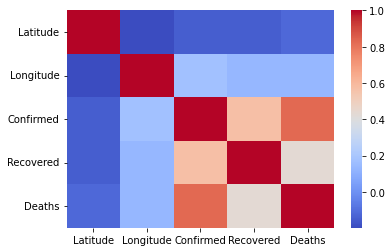

In [39]:
sns.heatmap(corr_matrix, cmap='coolwarm')